# IT8302 Applied Machine Learning - CA1 Submission
- Submitted by: Lo Ka Fai
- Student ID: 7304896V
- Submission date: 1 Dec 2024

# Part B: Regression - King County House - Predicting house price

### Kaggle dataset Link: https://www.kaggle.com/datasets/harlfoxem/housesalesprediction

# 1. Import Libraries

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets


# 2. Dataset Import and Exploratory Data Analysis

In [116]:
df = pd.read_csv("kc_house_data.csv")

In [117]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

#### No Null or missing values

In [102]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [104]:
df["waterfront"].value_counts()

waterfront
0    21450
1      163
Name: count, dtype: int64

In [105]:
df["price"].value_counts()

price
350000.0     172
450000.0     172
550000.0     159
500000.0     152
425000.0     150
            ... 
607010.0       1
1362500.0      1
298800.0       1
957500.0       1
402101.0       1
Name: count, Length: 4028, dtype: int64

In [106]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


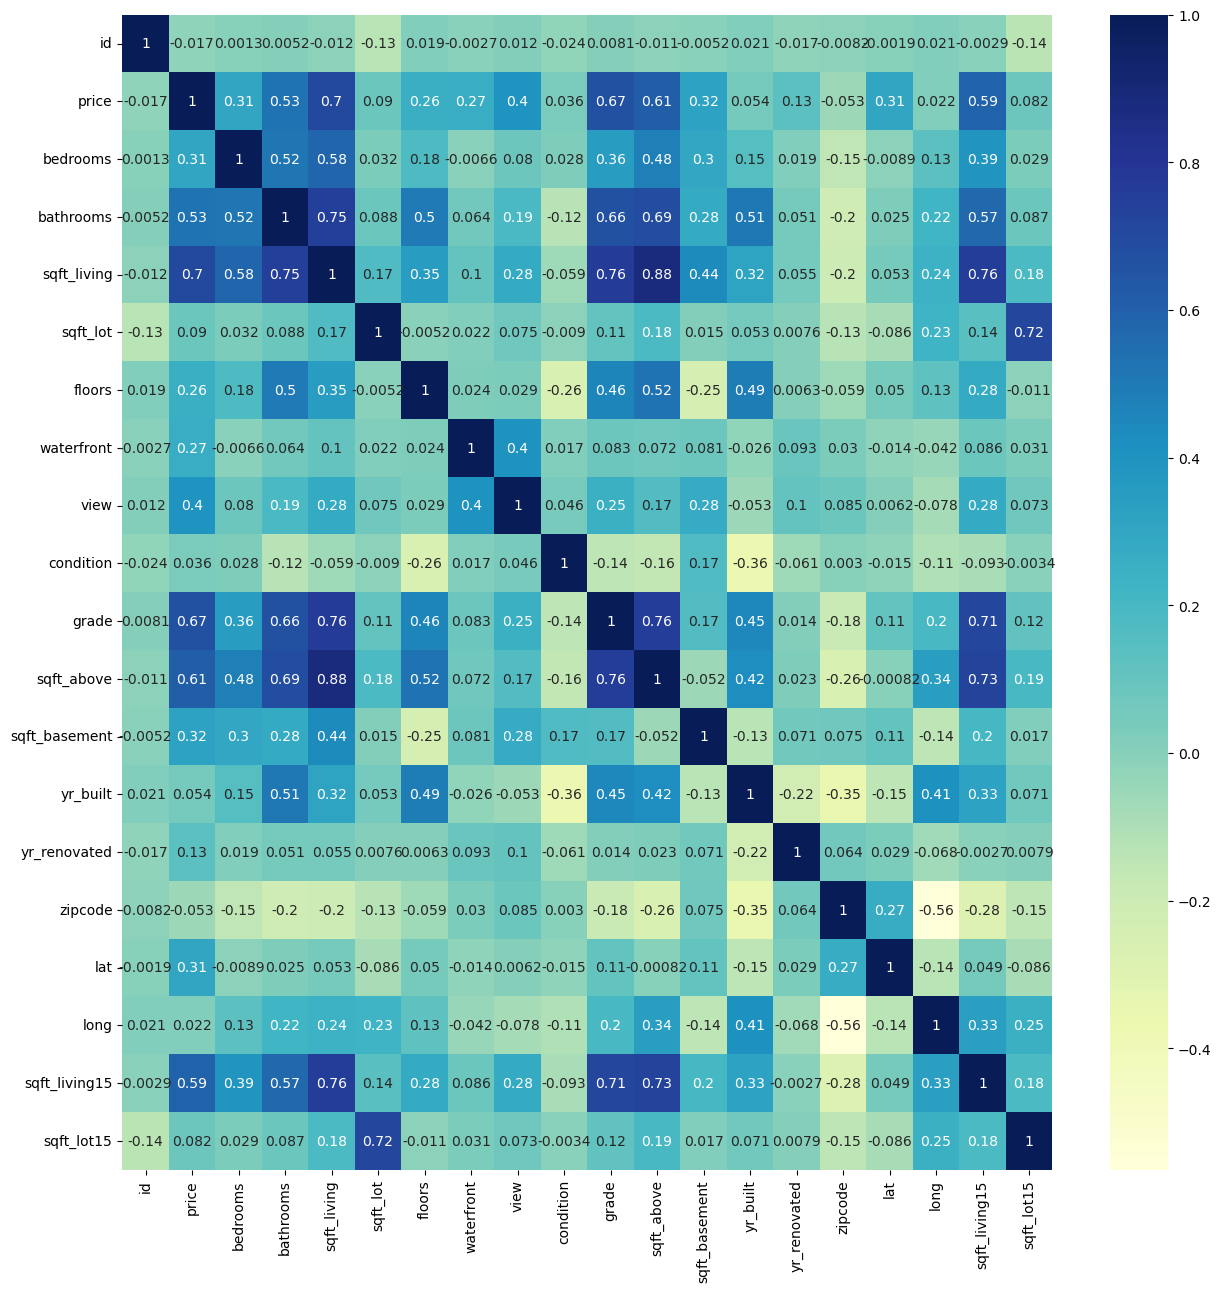

In [107]:
plt.subplots(figsize=(15, 15))
sns.heatmap(df.select_dtypes(include='number').corr(), cmap="YlGnBu", annot=True)
plt.show()

### Note: sqft_living15 and sqft_lot15 are highly correlated with sqft_living and sqft_lot

array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>],
       [<Axes: title={'center': 'sqft_living'}>,
        <Axes: title={'center': 'sqft_lot'}>,
        <Axes: title={'center': 'floors'}>,
        <Axes: title={'center': 'waterfront'}>],
       [<Axes: title={'center': 'view'}>,
        <Axes: title={'center': 'condition'}>,
        <Axes: title={'center': 'grade'}>,
        <Axes: title={'center': 'sqft_above'}>],
       [<Axes: title={'center': 'sqft_basement'}>,
        <Axes: title={'center': 'yr_built'}>,
        <Axes: title={'center': 'yr_renovated'}>,
        <Axes: title={'center': 'zipcode'}>],
       [<Axes: title={'center': 'lat'}>,
        <Axes: title={'center': 'long'}>,
        <Axes: title={'center': 'sqft_living15'}>,
        <Axes: title={'center': 'sqft_lot15'}>]], dtype=object)

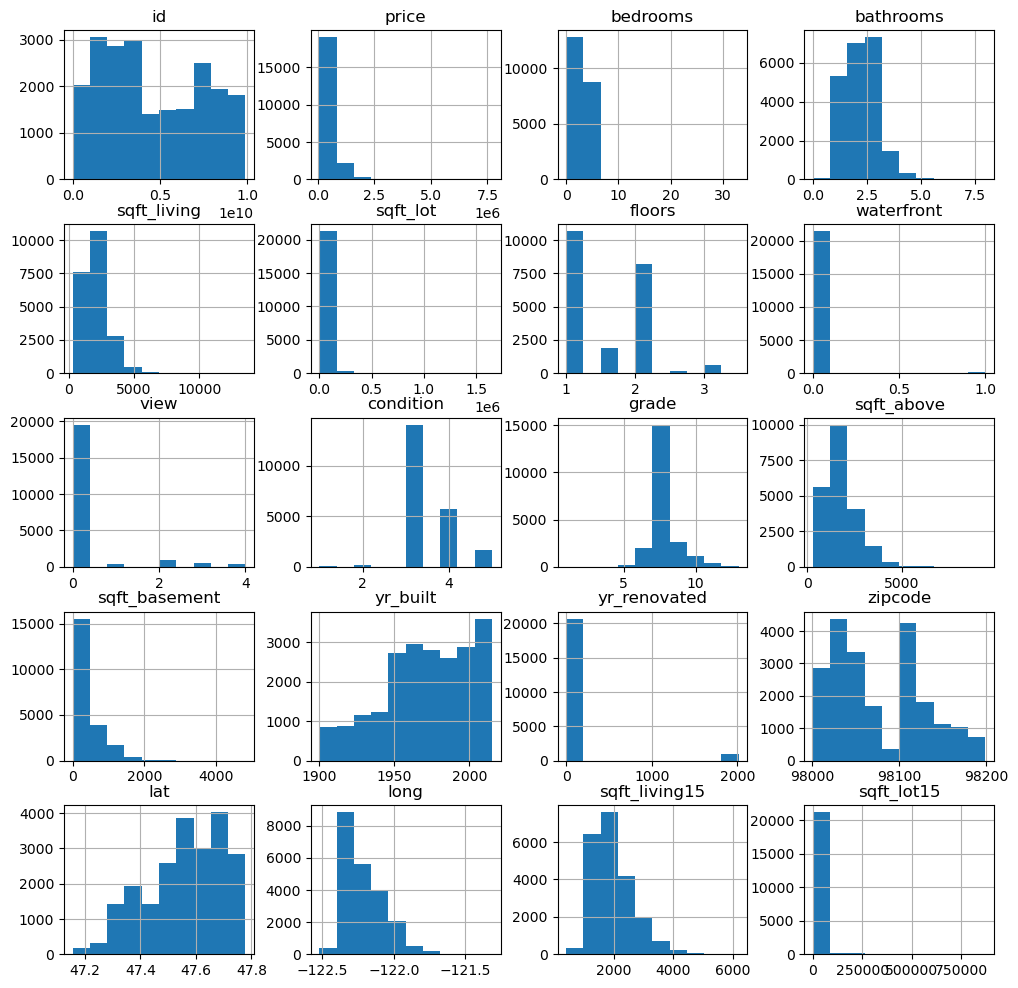

In [108]:
df.hist(figsize=(12,12))

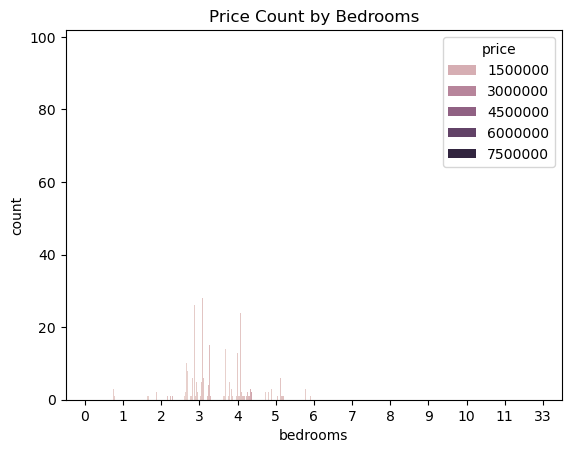

In [109]:
sns.countplot(x="bedrooms", hue="price", data=df)
plt.title("Price Count by Bedrooms")
plt.show()

# 3. Data Preperation 

### 3.1 Data Cleaning - Data manipulation and missing values handling

In [118]:
# Remove sqft_living15, sqft_above and sqft_lot15 as they are relatively highly correlated with sqft_living and sqft_lot, creating multi-collinearity problem.
# Remove id as its a running numbers, and date as we want the price to be independent of time

df1 = df.drop(['sqft_living15', 'sqft_lot15', 'sqft_above', 'date', 'id'], axis=1)

In [119]:
df1.head(3)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,0,1955,0,98178,47.5112,-122.257
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,400,1951,1991,98125,47.7210,-122.319
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,0,1933,0,98028,47.7379,-122.233


In [120]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_basement  21613 non-null  int64  
 11  yr_built       21613 non-null  int64  
 12  yr_renovated   21613 non-null  int64  
 13  zipcode        21613 non-null  int64  
 14  lat            21613 non-null  float64
 15  long           21613 non-null  float64
dtypes: float64(5), int64(11)
memory usage: 2.6 MB


In [121]:
# Rank variables correlations against price  
corr = df1.corr()
corr.sort_values(['price'], ascending=False, inplace=True)
print(corr['price'])

price            1.000000
sqft_living      0.702035
grade            0.667434
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
yr_built         0.054012
condition        0.036362
long             0.021626
zipcode         -0.053203
Name: price, dtype: float64


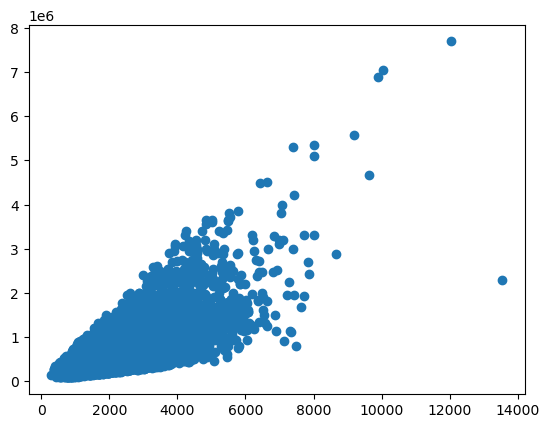

In [122]:
plt.scatter(x= "sqft_living", y="price", data=df1)

### Note: price and sqft_living indeed have strong positive correlation relationship 

In [123]:
# Remove the bottom 7 least correlated columns with price

df1 = df1.drop(["zipcode", "long", "condition", "yr_built", "sqft_lot", "yr_renovated", "floors"], axis=1)

In [124]:
df1.head(3)

,price,bedrooms,bathrooms,sqft_living,waterfront,view,grade,sqft_basement,lat
0,221900.0,3,1.00,1180,0,0,7,0,47.5112
1,538000.0,3,2.25,2570,0,0,7,400,47.7210
2,180000.0,2,1.00,770,0,0,6,0,47.7379


In [125]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   waterfront     21613 non-null  int64  
 5   view           21613 non-null  int64  
 6   grade          21613 non-null  int64  
 7   sqft_basement  21613 non-null  int64  
 8   lat            21613 non-null  float64
dtypes: float64(3), int64(6)
memory usage: 1.5 MB


### 3.2 Remove outliers (Regression model tends to be more sensitive to data with outliers) 

In [126]:
# Check existing data stats
df1.describe()

,price,bedrooms,bathrooms,sqft_living,waterfront,view,grade,sqft_basement,lat
count,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,0.007542,0.234303,7.656873,291.509045,47.560053
std,3.671272e+05,0.930062,0.770163,918.440897,0.086517,0.766318,1.175459,442.575043,0.138564
min,7.500000e+04,0.000000,0.000000,290.000000,0.000000,0.000000,1.000000,0.000000,47.155900
25%,3.219500e+05,3.000000,1.750000,1427.000000,0.000000,0.000000,7.000000,0.000000,47.471000
50%,4.500000e+05,3.000000,2.250000,1910.000000,0.000000,0.000000,7.000000,0.000000,47.571800
75%,6.450000e+05,4.000000,2.500000,2550.000000,0.000000,0.000000,8.000000,560.000000,47.678000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.000000,4.000000,13.000000,4820.000000,47.777600


### 3.2.1 Check outliers conditions

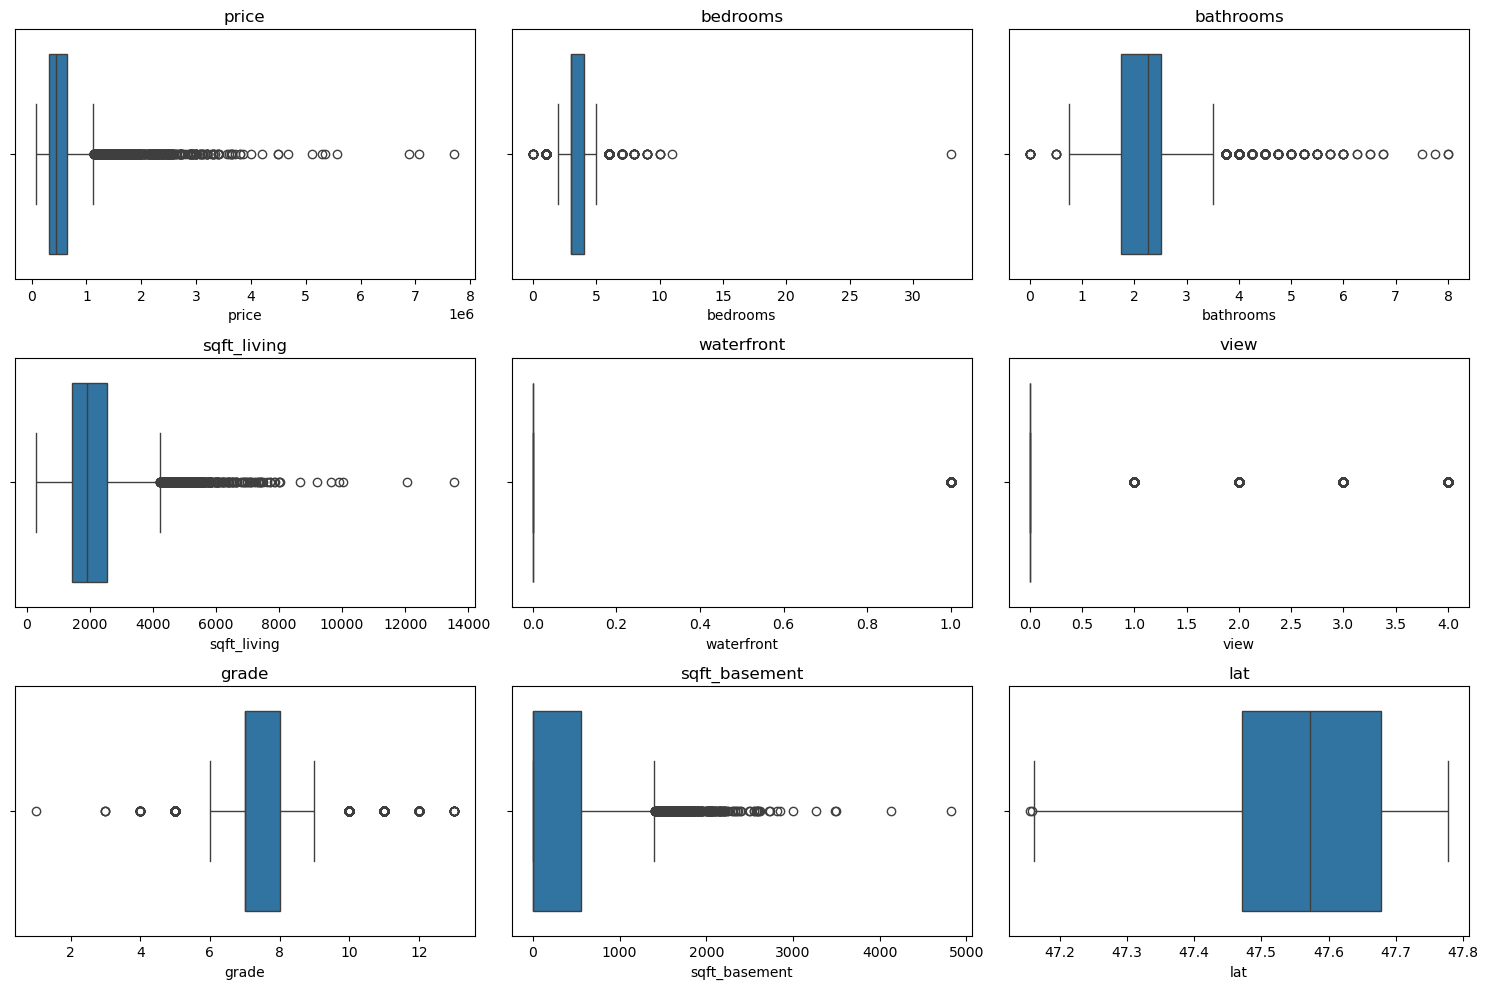

In [127]:
# Plot Boxplot to check outliers 

# Defind Function to plot boxplots for numeric columns
def plot_boxplots(df1):
    # Plot boxplot for each numeric column
    plt.figure(figsize=(15, 10))
    for i, column in enumerate(df1.columns, 1):
        plt.subplot(3, 3, i)  # Adjust the number of subplots based on your data
        sns.boxplot(x=df1[column])
        plt.title(f'{column}')
    plt.tight_layout()
    plt.show()

# Apply the function to plot boxplots
plot_boxplots(df1)


### Note: Columns need to remove outliers: price, bedrooms, bathrooms, sqft_living, sqft_basement

### 3.2.2 Remove outliers (check 0 in bedrooms & bathrooms are gone, 33 in bedrooms gone)

In [128]:
# Define function to remove outliers based on IQR
def remove_outliers(df1):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df1.quantile(0.25)
    Q3 = df1.quantile(0.75)
    
    # Calculate IQR (Interquartile Range)
    IQR = Q3 - Q1
    
    # Define lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter the dataframe to remove outliers
    df_no_outliers = df1[(df1 >= lower_bound) & (df1 <= upper_bound)]
    
    return df_no_outliers


In [129]:
# Remove outliers in selected columns and integrate back into df1
columns_to_check = ["price", "bedrooms", "bathrooms", "sqft_living", "sqft_basement"]

# Apply the function and update the original DataFrame
df1[columns_to_check] = remove_outliers(df1[columns_to_check])

df1 = df1.dropna()

In [130]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19457 entries, 0 to 21612
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          19457 non-null  float64
 1   bedrooms       19457 non-null  float64
 2   bathrooms      19457 non-null  float64
 3   sqft_living    19457 non-null  float64
 4   waterfront     19457 non-null  int64  
 5   view           19457 non-null  int64  
 6   grade          19457 non-null  int64  
 7   sqft_basement  19457 non-null  float64
 8   lat            19457 non-null  float64
dtypes: float64(6), int64(3)
memory usage: 1.5 MB


### 3.2.3 Check outliers condition after removal
### 0 removed from bedrooms and bathrooms, 33 removd from bedroom, 7.7m removed from price

In [131]:
# Verify the updated DataFrame stats
df1.describe()

,price,bedrooms,bathrooms,sqft_living,waterfront,view,grade,sqft_basement,lat
count,1.945700e+04,19457.000000,19457.000000,19457.000000,19457.000000,19457.000000,19457.000000,19457.000000,19457.000000
mean,4.689256e+05,3.289407,2.017372,1925.191396,0.002724,0.156036,7.506656,242.297579,47.556085
std,2.010049e+05,0.777767,0.661399,699.266416,0.052122,0.604953,0.996380,369.585104,0.141784
min,7.800000e+04,2.000000,0.750000,440.000000,0.000000,0.000000,4.000000,0.000000,47.155900
25%,3.130000e+05,3.000000,1.500000,1397.000000,0.000000,0.000000,7.000000,0.000000,47.457200
50%,4.320000e+05,3.000000,2.000000,1830.000000,0.000000,0.000000,7.000000,0.000000,47.566300
75%,5.900000e+05,4.000000,2.500000,2370.000000,0.000000,0.000000,8.000000,480.000000,47.680200
max,1.127000e+06,5.000000,3.500000,4230.000000,1.000000,4.000000,12.000000,1400.000000,47.777600


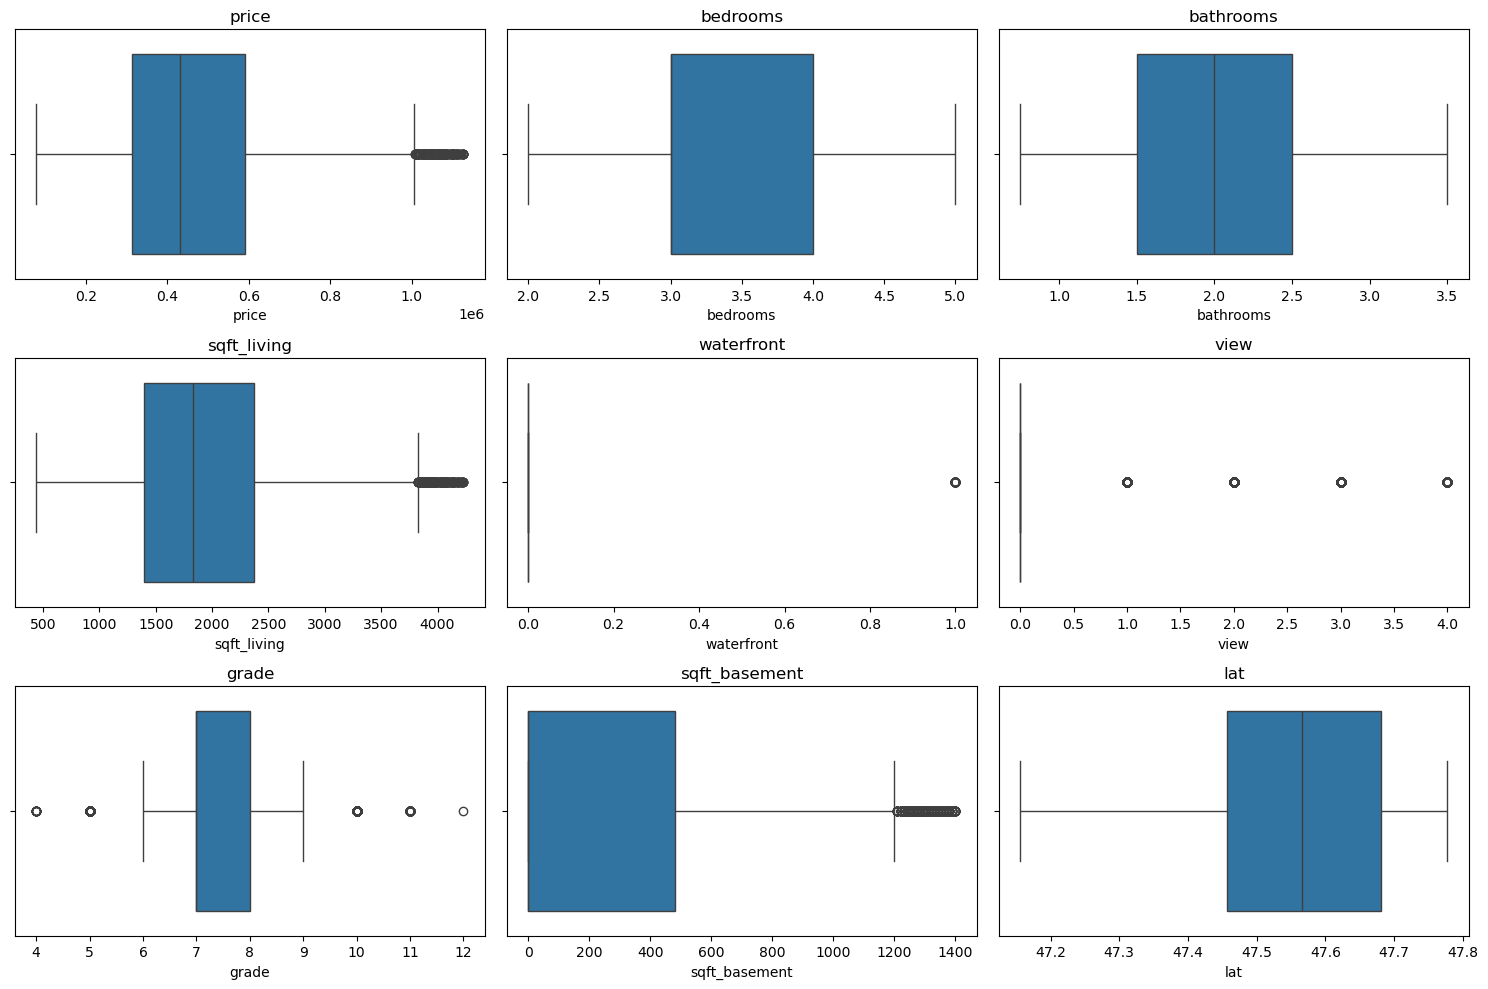

In [132]:
# Plot Boxplot to check outliers condition again after removal  
plot_boxplots(df1)

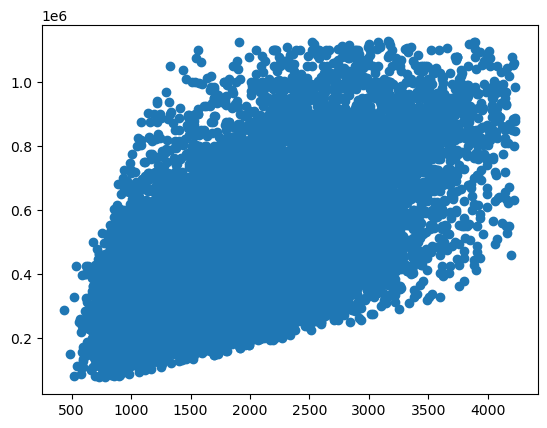

In [133]:
plt.scatter(x= "sqft_living", y="price", data=df1)

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>],
       [<Axes: title={'center': 'sqft_living'}>,
        <Axes: title={'center': 'waterfront'}>,
        <Axes: title={'center': 'view'}>],
       [<Axes: title={'center': 'grade'}>,
        <Axes: title={'center': 'sqft_basement'}>,
        <Axes: title={'center': 'lat'}>]], dtype=object)

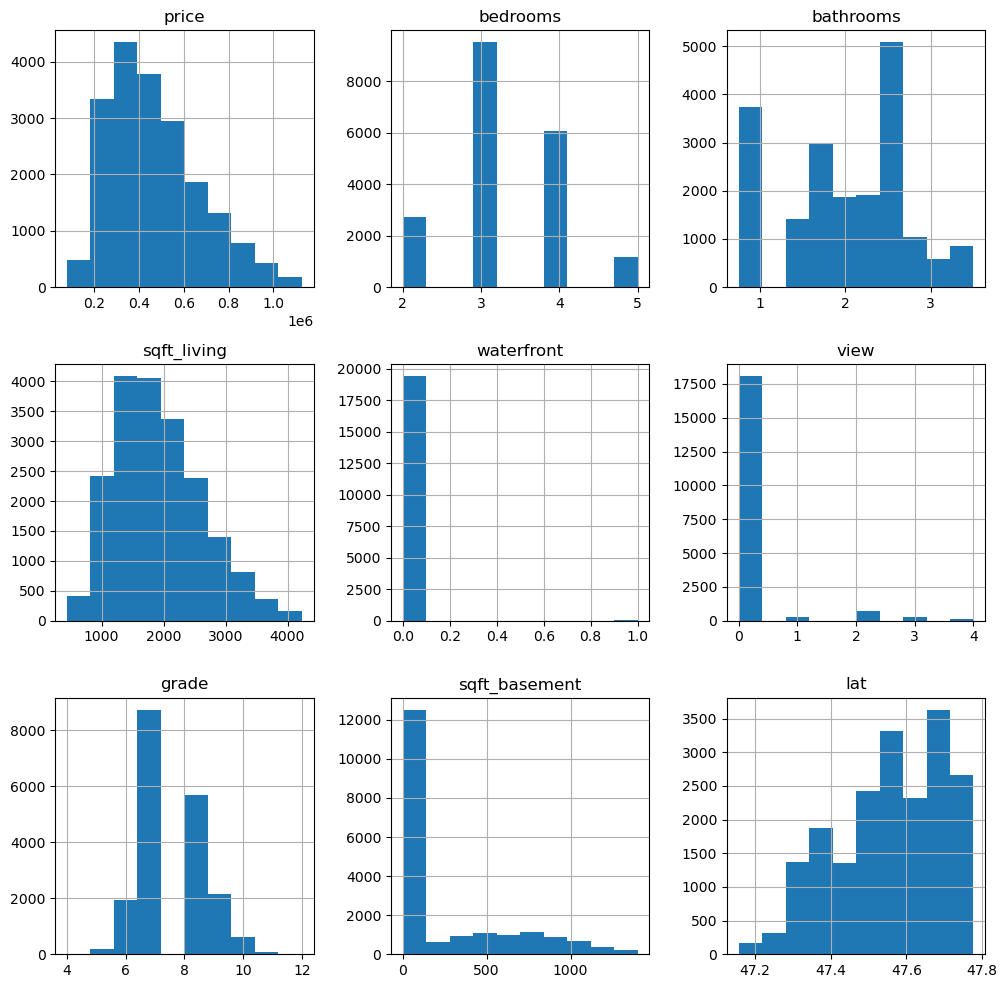

In [134]:
df1.hist(figsize=(12,12))

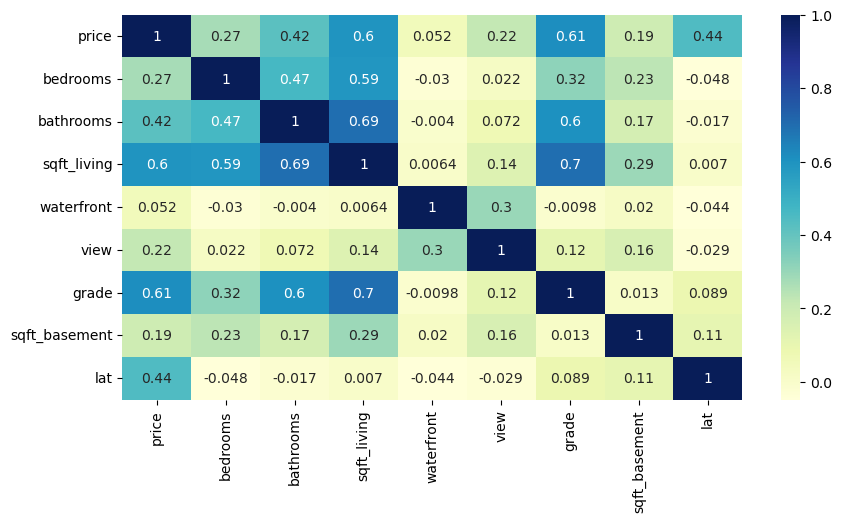

In [140]:
plt.subplots(figsize=(10, 5))
sns.heatmap(df1.select_dtypes(include='number').corr(), cmap="YlGnBu", annot=True)
plt.show()

# 4. Model Training

### 3 Regressors to be evaluated - Linear Regression, KNN, XGBoost 

### 4.1 Import libraries

In [141]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

In [142]:
df1.head()

,price,bedrooms,bathrooms,sqft_living,waterfront,view,grade,sqft_basement,lat
0,221900.0,3.0,1.00,1180.0,0,0,7,0.0,47.5112
1,538000.0,3.0,2.25,2570.0,0,0,7,400.0,47.7210
2,180000.0,2.0,1.00,770.0,0,0,6,0.0,47.7379
3,604000.0,4.0,3.00,1960.0,0,0,7,910.0,47.5208
4,510000.0,3.0,2.00,1680.0,0,0,8,0.0,47.6168


### 4.2 Split data into train and test sets

In [143]:
from sklearn.model_selection import train_test_split

X = df1.drop(["price"],axis=1)
y = df1["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Data Scaling (on sqft_living, sqft_basement)

### To resize sqft_living and sqft_basement to a comparable range (Normalization) 

In [144]:
X_train.describe()

,bedrooms,bathrooms,sqft_living,waterfront,view,grade,sqft_basement,lat
count,15565.00000,15565.000000,15565.000000,15565.000000,15565.000000,15565.000000,15565.000000,15565.000000
mean,3.29001,2.019290,1925.970318,0.002891,0.155541,7.509541,242.716993,47.556631
std,0.77768,0.661044,698.680544,0.053693,0.605829,0.996970,370.390953,0.141183
min,2.00000,0.750000,440.000000,0.000000,0.000000,4.000000,0.000000,47.155900
25%,3.00000,1.500000,1390.000000,0.000000,0.000000,7.000000,0.000000,47.459000
50%,3.00000,2.000000,1830.000000,0.000000,0.000000,7.000000,0.000000,47.566700
75%,4.00000,2.500000,2370.000000,0.000000,0.000000,8.000000,480.000000,47.680200
max,5.00000,3.500000,4230.000000,1.000000,4.000000,12.000000,1400.000000,47.777600


In [145]:
X_train.shape

(15565, 8)

In [146]:
X_test.describe()

,bedrooms,bathrooms,sqft_living,waterfront,view,grade,sqft_basement,lat
count,3892.000000,3892.000000,3892.000000,3892.000000,3892.000000,3892.000000,3892.000000,3892.000000
mean,3.286999,2.009699,1922.076310,0.002055,0.158016,7.495118,240.620247,47.553904
std,0.778208,0.662847,701.685916,0.045297,0.601510,0.994059,366.387092,0.144161
min,2.000000,0.750000,540.000000,0.000000,0.000000,4.000000,0.000000,47.190000
25%,3.000000,1.500000,1400.000000,0.000000,0.000000,7.000000,0.000000,47.451300
50%,3.000000,2.000000,1820.000000,0.000000,0.000000,7.000000,0.000000,47.565400
75%,4.000000,2.500000,2350.000000,0.000000,0.000000,8.000000,480.000000,47.680100
max,5.000000,3.500000,4220.000000,1.000000,4.000000,11.000000,1400.000000,47.777600


In [147]:
X_test.shape

(3892, 8)

### 5.1 Scaling the data to range 1-20 by MinMaxScaler

In [148]:
from sklearn.preprocessing import MinMaxScaler
# Create a MinMaxScaler 
scaler = MinMaxScaler(feature_range=(1, 20))

# Fit the scaler on the selected columns of the training data
scaler.fit(X_train[["sqft_living", "sqft_basement"]])

# Transform the selected columns in both the training and test data
X_train[["sqft_living", "sqft_basement"]] = scaler.transform(X_train[["sqft_living", "sqft_basement"]])
X_test[["sqft_living", "sqft_basement"]] = scaler.transform(X_test[["sqft_living", "sqft_basement"]])


In [149]:
X_train.describe()

,bedrooms,bathrooms,sqft_living,waterfront,view,grade,sqft_basement,lat
count,15565.00000,15565.000000,15565.000000,15565.000000,15565.000000,15565.000000,15565.000000,15565.000000
mean,3.29001,2.019290,8.449455,0.002891,0.155541,7.509541,4.294016,47.556631
std,0.77768,0.661044,3.502620,0.053693,0.605829,0.996970,5.026734,0.141183
min,2.00000,0.750000,1.000000,0.000000,0.000000,4.000000,1.000000,47.155900
25%,3.00000,1.500000,5.762533,0.000000,0.000000,7.000000,1.000000,47.459000
50%,3.00000,2.000000,7.968338,0.000000,0.000000,7.000000,1.000000,47.566700
75%,4.00000,2.500000,10.675462,0.000000,0.000000,8.000000,7.514286,47.680200
max,5.00000,3.500000,20.000000,1.000000,4.000000,12.000000,20.000000,47.777600


In [152]:
X_train.shape

(15565, 8)

In [153]:
X_test.describe()

,bedrooms,bathrooms,sqft_living,waterfront,view,grade,sqft_basement,lat
count,3892.000000,3892.000000,3892.000000,3892.000000,3892.000000,3892.000000,3892.000000,3892.000000
mean,3.286999,2.009699,8.429934,0.002055,0.158016,7.495118,4.265560,47.553904
std,0.778208,0.662847,3.517687,0.045297,0.601510,0.994059,4.972396,0.144161
min,2.000000,0.750000,1.501319,0.000000,0.000000,4.000000,1.000000,47.190000
25%,3.000000,1.500000,5.812665,0.000000,0.000000,7.000000,1.000000,47.451300
50%,3.000000,2.000000,7.918206,0.000000,0.000000,7.000000,1.000000,47.565400
75%,4.000000,2.500000,10.575198,0.000000,0.000000,8.000000,7.514286,47.680100
max,5.000000,3.500000,19.949868,1.000000,4.000000,11.000000,20.000000,47.777600


In [151]:
X_test.shape

(3892, 8)

### Note: After data scaling, all feature variables are in the similar range.

# 6. Model Selection

### 6.1 Define Function to evaluate model performance

In [154]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    # Train the model
    model.fit(X_train, y_train)

    # Predict on training and testing data
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate model using MSE, RMSE and R2 
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    
    train_rmse = sqrt(train_mse)
    test_rmse = sqrt(test_mse)
    
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    # Display results
    print(f"Train MSE: {train_mse:.2f}")
    print(f"Test MSE: {test_mse:.2f}")
    print(f"Train RMSE: {train_rmse:.2f}")
    print(f"Test RMSE: {test_rmse:.2f}")
    print(f"Train R²: {train_r2:.2f}")
    print(f"Test R²: {test_r2:.2f}")

    # Return predictions for scatter plot use
    return y_train_pred, y_test_pred


### 6.2 Evaluate Baseline Model performance for Linear Regression, KNN and XGBoost

In [155]:
# Linear Regression
print("Linear Regression:")
lin_reg = LinearRegression()
evaluate_model(lin_reg, X_train, X_test, y_train, y_test)
print("-" * 50)

# K-Nearest Neighbors (KNN)
print("K-Nearest Neighbors:")
knn_reg = KNeighborsRegressor() # by default n_neighbors=5
evaluate_model(knn_reg, X_train, X_test, y_train, y_test)
print("-" * 50)

# XGBoost Regressor
print("XGBoost:")
xgb_reg = XGBRegressor(objective='reg:squarederror', random_state=42)
evaluate_model(xgb_reg, X_train, X_test, y_train, y_test)

Linear Regression:
Train MSE: 15125694633.42
Test MSE: 15119229531.99
Train RMSE: 122986.56
Test RMSE: 122960.28
Train R²: 0.63
Test R²: 0.63
--------------------------------------------------
K-Nearest Neighbors:
Train MSE: 11764042253.15
Test MSE: 18315101916.31
Train RMSE: 108462.17
Test RMSE: 135333.30
Train R²: 0.71
Test R²: 0.55
--------------------------------------------------
XGBoost:
Train MSE: 4944538161.02
Test MSE: 8565608264.31
Train RMSE: 70317.41
Test RMSE: 92550.57
Train R²: 0.88
Test R²: 0.79


(array([342344.6 , 217366.58, 768559.  , ..., 379097.9 , 344776.38,
        572501.06], dtype=float32),
 array([577402.2 , 225449.12, 360881.38, ..., 560083.  , 672848.25,
        584871.94], dtype=float32))

### Results: Baseline model XGBoost is selected for its obvious outperformance among the rest

# 7 Hyperparameter Tuning (GridSearchCV) apply to XGBoost Regressor

### 5-Fold Cross Validation (cv= 5)

In [156]:
from sklearn.model_selection import GridSearchCV

# Define the model
xgb = XGBRegressor(random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
}

# Perform grid search
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, 
                           scoring='r2', # focus on the ability to explain variance r2 by the model
                           cv=5, verbose=2, n_jobs=-1)

grid_search.fit(X_train, y_train)

# Best parameters and performance
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
Best Score: 0.785064466902223


### 10-Fold Cross Validation (cv= 10)

In [157]:
from sklearn.model_selection import GridSearchCV

# Define the model
xgb = XGBRegressor(random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
}

# Perform grid search
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, 
                           scoring='r2', # focus on the ability to explain variance r2 by the model
                           cv=10, verbose=2, n_jobs=-1)

grid_search.fit(X_train, y_train)

# Best parameters and performance
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Fitting 10 folds for each of 27 candidates, totalling 270 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
Best Score: 0.7861546633987515


# 8. Final Model Evaluation and Score

### 8.1 Evaluate XGBoost Model with the best parameters 

In [158]:
print("XGBoost:")
xgb_reg = XGBRegressor(objective='reg:squarederror', random_state=42, learning_rate=0.1, max_depth=5, n_estimators=200)
evaluate_model(xgb_reg, X_train, X_test, y_train, y_test)

XGBoost:
Train MSE: 6660272071.08
Test MSE: 8319650596.90
Train RMSE: 81610.49
Test RMSE: 91212.12
Train R²: 0.84
Test R²: 0.79


(array([342734.47, 228465.4 , 729121.25, ..., 360306.12, 336357.62,
        557187.94], dtype=float32),
 array([586552.56, 232395.12, 345669.94, ..., 578582.06, 682315.8 ,
        568223.44], dtype=float32))

### Results: Overall metrics performance is about the same as the Baseline Model

### 8.2 Use scatter plot to visualize relationship between Actual and Predicted prices (on Train and Test data)

Train MSE: 6660272071.08
Test MSE: 8319650596.90
Train RMSE: 81610.49
Test RMSE: 91212.12
Train R²: 0.84
Test R²: 0.79


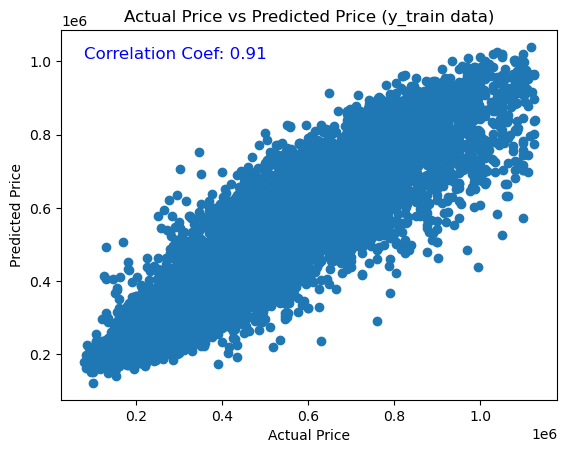

In [159]:
y_train_pred, y_test_pred = evaluate_model(xgb_reg, X_train, X_test, y_train, y_test)

# Calculate the correlation coefficient for train data
corr_coef = np.corrcoef(y_train, y_train_pred)[0, 1]

# Scatter plot
plt.scatter(y_train, y_train_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price (y_train data)")

# Add correlation coefficient text on the plot
plt.text(min(y_train), max(y_train_pred), f"Correlation Coef: {corr_coef:.2f}", 
       fontsize=12, color='blue', ha='left', va='top')

plt.show()

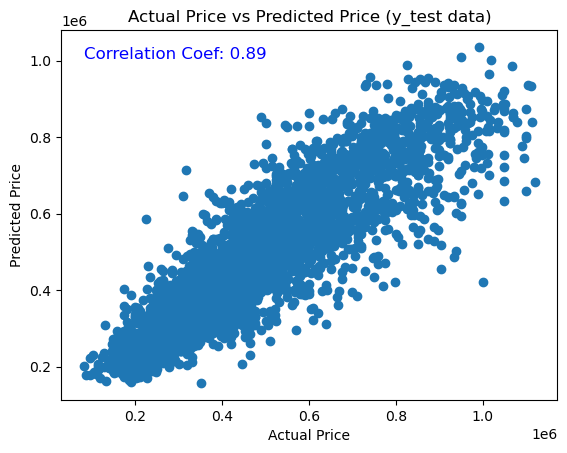

In [160]:
# Calculate the correlation coefficient for test data
corr_coef = np.corrcoef(y_test, y_test_pred)[0, 1]

#Scatter plot
plt.scatter(y_test, y_test_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price (y_test data)")

# Add correlation coefficient on the plot
plt.text(min(y_test), max(y_test_pred), f"Correlation Coef: {corr_coef:.2f}", 
       fontsize=12, color='blue', ha='left', va='top')

plt.show()

### Results: Actual Prices and Predicted Prices on both Train and Test data have strong positive correlation.

# 9. Conclusions

## Model Performance:
### The XGBoost model achieved a R2 score of 0.84 on the training dataset and 0.79 on the test dataset, indicating strong predictive capability.

## Interpretation of High MSE:
### The high Mean Squared Error (MSE) is primarily due to the large scale of the target variable (house prices) rather than a flaw in the model.

## RMSE Analysis:
### The Root Mean Squared Error (RMSE) values range between 81,000 and 91,000 for the training and test datasets. This means the model’s predictions are, on average, off by approximately by $81K to 91K.

## Model Fit and Generalization:

### The R2 scores suggest that the model explains 84% of the variance in the training data and 79% of the variance in the test data.
### The relatively small difference between the training and test R2 scores indicates that the model generalizes well to unseen data and is not heavily overfitting.

## Future Steps for Model Improvement:

### 1. Feature Reassessment: Reintroduce additional feature variables from the dataset to evaluate their impact on improving model performance.
### 2. Latitude and Longitude Utilization: Explore feature engineering techniques to make the lat and long variables useful in prediction.
### 3. Hyperparameter Tuning: Utilize GridSearchCV to explore a broader range of hyperparameters in the XGBoost regressor for further performance optimization.
### 4. Algorithm Exploration: Test other regression algorithms to identify potentially better-performing and more robust models for house price prediction.